<a href="https://colab.research.google.com/github/erobrien6/OBrien_DSPN_S23/blob/main/Exercise14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 14: Mediation

This homework assignment is designed to give you practice with mediation. You won't need to load in any data for this homework -- we'll simulate data instead.

---
## 1. Simulating data (3 points)


In this homework, we're going to simulate the relationship between age, word reading experience, and reading comprehension skill. Older children tend to be better at reading comprehension tasks, but this isn't just an inherent part of getting older. It's a combination of gaining more experience with reading, oral language skills, and executive functions development. In this homework, though, we're going to simplify this relationship down to a direct effect of age on reading comprehension (since improvements in oral language skills and executive functions are more guaranteed as children age than reading practice is), and a mediation of word reading experience.

In graphical form: 
![picture](https://drive.google.com/uc?id=1wdm9xuiJhBJor99-9GnicO2_rzkGWtfN)

Writing the relationship out formally: 

$$x = \beta_{xa} a + \beta_{x0} + \epsilon_{x}$$

$$c = \beta_{ca} a + \beta_{cx} x + \beta_{c0} + \epsilon_c$$



$c$ is reading comprehension, $x$ is word reading experience, and $a$ is age. $\beta_{c0}$ and $\beta_{x0}$ are intercept terms for their respective formulas, and $\epsilon_{c}$ and $\epsilon_{x}$ are gaussian noise terms. We'll start by writing a function, `simulate_data`, that can simulate this relationship. The input values are set and the function structure is provided below. Complete the function such that it takes in those input variables and generates $age$, $x$, and $c$ values. Use `runif()` to generate ages. Use `rnorm()` to generate the noise terms. 

In [8]:
sample_size = 100 # How many children in data set? 
age_lo = 80     # minimum age, in months
age_hi = 200    # maximum age, in months
beta_xa = 0.5   # amount by which experience changes for increase of one month in age
beta_x0 = -5    # amount of experience when age = 0 (not interpretable, since minimum age for this data is 80 months)
sd_x = 50       # standard dev of gaussian noise term, epsilon_x
beta_ca = 0.8   # amount that comprehension score improves for every increase of one unit in age
beta_cx = 3     # amount that comprehension score improves for every increase of one unit in reading experience
beta_c0 = 10    # comprehension score when reading experience is 0. 
sd_c = 85      # standard dev of gaussian noise term, epsilon_c

simulate_data <- function(sample_size, age_lo, age_hi, beta_xa, 
                          beta_x0, sd_x, beta_ca, beta_cx, beta_c0, sd_c) {
      set.seed(12345)
      age <- runif(sample_size, age_lo, age_hi)
      x <- beta_xa*age + beta_x0 + rnorm(sample_size, sd=sd_x)
      c <- beta_ca*age + beta_cx*x + beta_c0 + rnorm(sample_size, sd=sd_c)
      return(data.frame(age = age, x = x, c = c))
}

dat <- simulate_data(sample_size, age_lo, age_hi, beta_xa, beta_x0, sd_x, beta_ca, beta_cx, beta_c0, sd_c)
head(dat)


,age,x,c
,<dbl>,<dbl>,<dbl>
1,166.50847,51.23493,159.2687
2,185.09278,184.93102,759.4811
3,171.31788,83.33845,413.6686
4,186.33495,105.75062,407.7675
5,134.77772,28.84003,195.1092
6,99.96461,58.87999,245.2812


---
## 2. Visualizing Data (2 point)

Load the `tidyverse` library.

In [ ]:
library(tidyverse)


a) Plot the relationship between age and reading comprehension. 

`geom_smooth()` using formula = 'y ~ x'


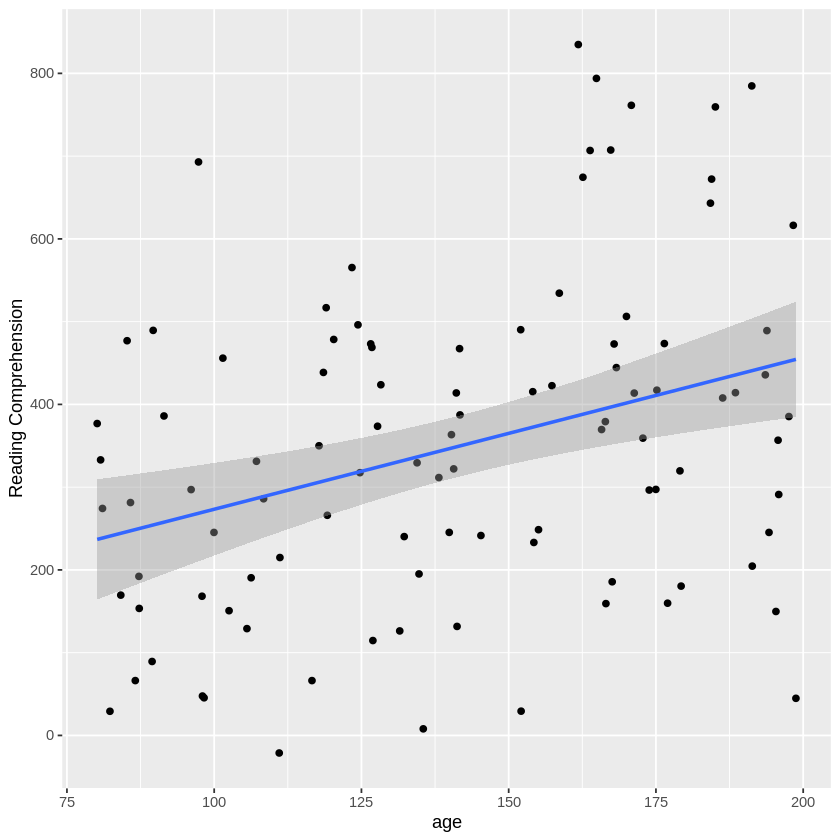

In [11]:
library(ggplot2)

ggplot(dat, aes(x=age, y=c)) +
  geom_point() +
  geom_smooth(method='lm') +
  ylab("Reading Comprehension")


b) Plot the relationship between reading experience, age, and reading comprehension.

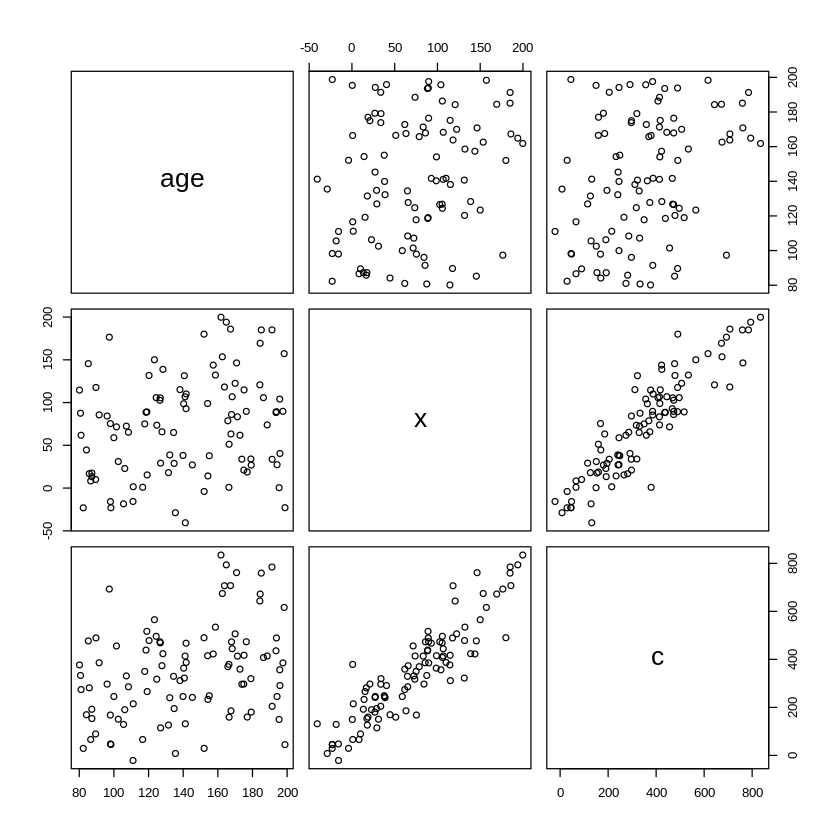

In [14]:
pairs(dat)

# Age & Reading experience (x) - slight positive cor
# Age & Reading comprehension (c) - slight positive cor
# Reading experience & comprehension - strong positive cor

---
## 3. Mediation Analysis (4 points)

Load the `mediation` library.

In [ ]:
#install.packages('mediation')
library(mediation)

Use the `mediate` function to determine whether `x` mediates the relationship between `age` and `c`. Use `summary()` to print the model results. *Hint: see the mediation and moderation tutorial.*

In [16]:
fitM <- lm(x ~ age, data=dat)
fitY <- lm(c ~ x + age, data=dat)
summary(fitM)
summary(fitY)

fitMed <- mediate(fitM, fitY, treat='age', mediator='x')
summary(fitMed)

cor(dat$x, dat$c)


Call:
lm(formula = x ~ age, data = dat)

Residuals:
     Min       1Q   Median       3Q      Max 
-117.882  -44.860    2.168   36.975  120.094 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)  19.3658    23.1364   0.837   0.4046  
age           0.3801     0.1589   2.392   0.0186 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 57.05 on 98 degrees of freedom
Multiple R-squared:  0.05518,	Adjusted R-squared:  0.04554 
F-statistic: 5.724 on 1 and 98 DF,  p-value: 0.01864



Call:
lm(formula = c ~ x + age, data = dat)

Residuals:
     Min       1Q   Median       3Q      Max 
-197.588  -52.550   -0.325   51.814  223.998 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  33.1024    32.7732   1.010  0.31499    
x             2.9335     0.1426  20.574  < 2e-16 ***
age           0.7188     0.2307   3.116  0.00241 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 80.52 on 97 degrees of freedom
Multiple R-squared:  0.8348,	Adjusted R-squared:  0.8314 
F-statistic: 245.1 on 2 and 97 DF,  p-value: < 2.2e-16



Causal Mediation Analysis 

Quasi-Bayesian Confidence Intervals

               Estimate 95% CI Lower 95% CI Upper p-value    
ACME              1.137        0.241         2.06   0.010 ** 
ADE               0.722        0.252         1.15   0.002 ** 
Total Effect      1.859        0.865         2.89  <2e-16 ***
Prop. Mediated    0.610        0.235         0.84   0.010 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Sample Size Used: 100 


Simulations: 1000 


[1] 0.9045802

---
## 5. Reflection (1 point)
How do you interpret these results? Why do you think the analysis yielded this result?

> *The first model showed that there is a significant, positive relationship between age and word reading experience. The second model showed that there was a significant positive relationship between word reading experience and reading comprehension, and between age and reading comprehension. The mediation model shows that there is a positive mediation effect and a significant proportion of indirect effects relative to the direct effect. Overall, the ACME and ADE output suggest that there is both significant indirect and direct effects contributing to the total effect. I think the mediation yielded this result in part because the mediator and outcome variables are so correlated (0.905), so the proportion mediated is relatively high and age has a similar relationship to the mediator and the outcome variable.* 
> 

**DUE:** 5pm EST, April 3, 2023

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here. 
> *Someone's Name*